In [4]:
import pandas as pd 
import numpy as np
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns

yf.pdr_override()
#the below is start of the sample to start this ... research the yfinance libarary arguments for more answers. 
#tickerSymbol='TSLA'
#tickerData=yf.Ticker(tickerSymbol)
#tickerDf=tickerData.history(period='1d',start='2020-12-20',end='2021-1-7')
#tickerDf.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])
#tickerData.calendar
#tickerData.recommendations
#tickerData.info

stonks = ['^GSPC']

adj_close_df = pd.DataFrame()
for i in stonks:
        start = dt.datetime(1970,1,1)
        end = dt.datetime(2021,10,2)
        df = pdr.get_data_yahoo(i,start,end)
        df = df['Adj Close']
        df.columns = {i:f'{i} Adj Close'}
        adj_close_df = pd.concat([adj_close_df,df]
                            , axis = 'columns'
                            , join = 'outer'
                            )
adj_close_df.columns = stonks
adj_close_df.pct_change()


[*********************100%***********************]  1 of 1 completed


,^GSPC
1970-01-02,NaN
1970-01-05,0.004946
1970-01-06,-0.006848
1970-01-07,-0.002047
1970-01-08,0.000540
...,...
2021-02-04,0.010853
2021-02-05,0.003897
2021-02-08,0.007399
2021-02-09,-0.001114


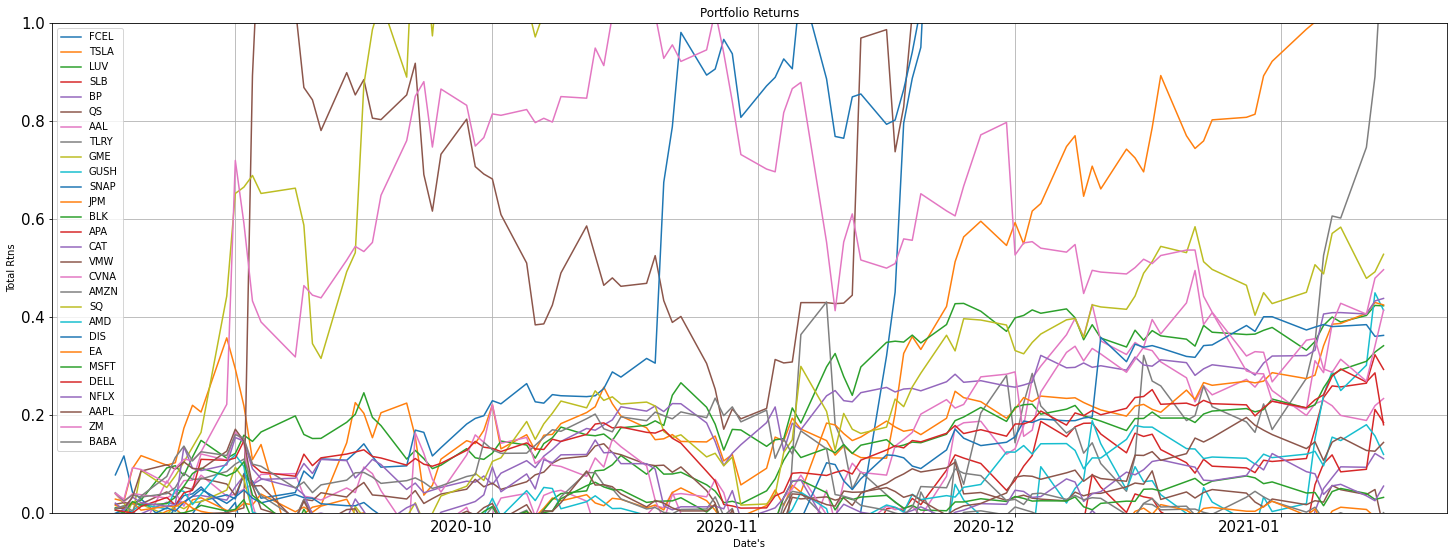

In [2]:

dropped_values_adj_close = adj_close_df.dropna()
dropped_values_pct_change = dropped_values_adj_close.pct_change()
cummulative_returns = ((1 + dropped_values_pct_change).cumprod()-1)
cummulative_returns.plot(
        kind='line'
        , figsize=(25,10)
        , grid=True
        , title="Portfolio Returns"
        , ylabel="Total Rtns"
        , xlabel='Date\'s'
        , rot=360
        , fontsize=15
        , ylim=(0,1))
daily_std = dropped_values_pct_change.std().sort_values()



In [4]:
annual_std=daily_std*np.sqrt(252)
annual_std.sort_values(inplace=True)
rolltwentyone=dropped_values_pct_change.rolling(window=21).std()

<AxesSubplot:>

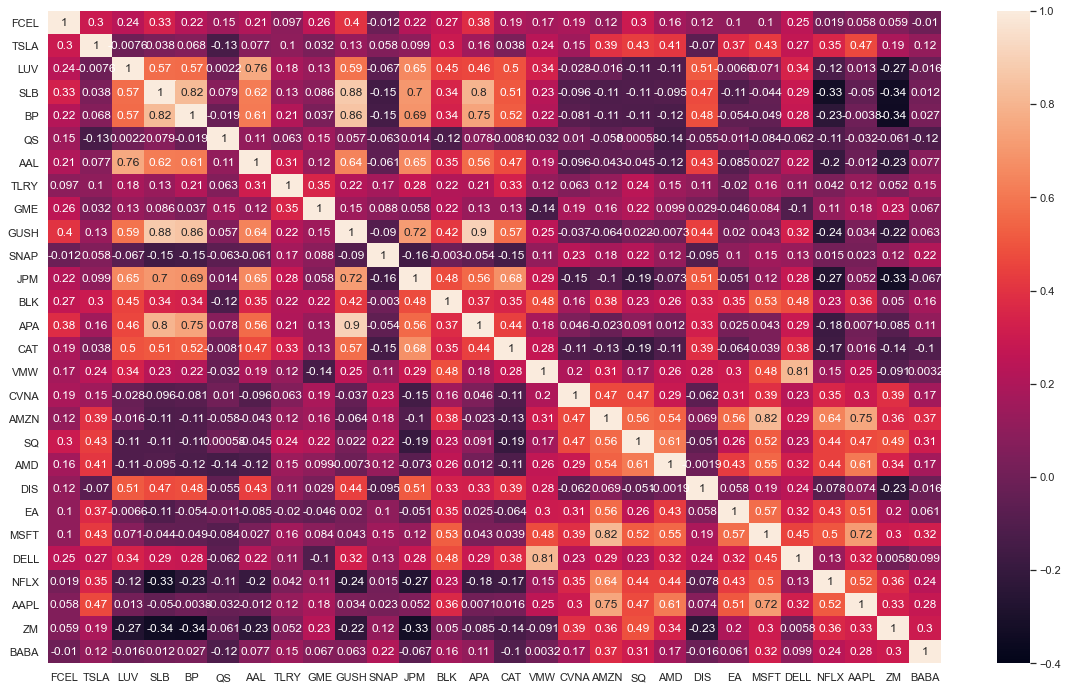

In [6]:
correlation=dropped_values_pct_change.corr()
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(correlation, vmin=-.4, vmax=1,annot=True)

In [21]:
for key in dropped_values_pct_change(keys):
    


SyntaxError: unexpected EOF while parsing (<ipython-input-21-e666739eae73>, line 2)

In [2]:
import quandl
mydata = quandl.get("FRED/GDP")
mydata



,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2019-07-01,21540.325
2019-10-01,21747.394
2020-01-01,21561.139


In [1]:
import pprint as pprint
from dotenv import load_dotenv
import os
load_dotenv()

api_key=os.getenv("Quandl")
type(api_key)

NoneType

ERROR: Could not find a version that satisfies the requirement pprint
ERROR: No matching distribution found for pprint
Note: you may need to restart the kernel to use updated packages.


In [14]:
%matplotlib inline
import quantstats as qs

In [15]:
qs.extend_pandas()
stock= qs.utils.download_returns('SPY')
qs.stats.sharpe(stock)

0.6008659360128249

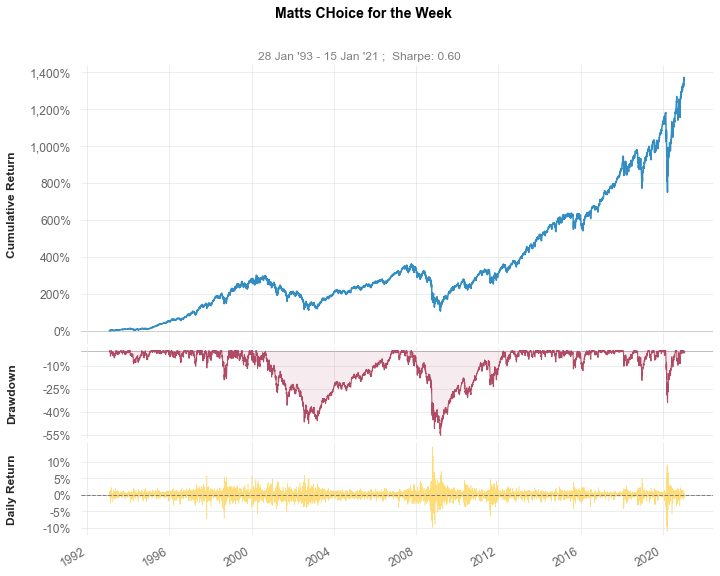

In [16]:
qs.plots.snapshot(stock,title='Matts CHoice for the Week')

In [21]:
qs.plots.html(stock)

AttributeError: module 'quantstats.plots' has no attribute 'html'